##Greedy Algorithms – Week 5
###Angel Mateo González Bejarano 
###Oscar Alejandro Gómez Suarez

###Money Change Again
The goal now is
to apply dynamic programming for solving the Money Change Problem for denominations 1, 3, and 4.



In [ ]:
import java.util.Scanner;
import java.util.Arrays;

public class ChangeDP {
    private static int getChange(int m) {
        int change[] = {1, 3, 4};
        int coins[] = new int[m + 1];
        Arrays.fill(coins, m*m);
        coins[0] = 0;
        for(int i = 1; i < m + 1; i++){
            for(int c = 0; c < change.length; c++){
                if(change[c] <= i){
                    int paso = coins[i - change[c]];
                    if((paso != m*m) && paso + 1 < coins[i]){
                        coins[i] = paso + 1;
                    }
                }
            }
        }
        return coins[m];
    }

    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);
        int m = scanner.nextInt();
        //int[] p = getChange(m);
        /*for(int i  = 0; i < p.length; i++){
            System.out.print(p[i] + "  ");
        } */
        System.out.println(getChange(m));
        scanner.close();
    }
}



###Primitive Calculator

Given an integer 𝑛, compute the minimum number of operations needed to obtain the number 𝑛
starting from the number 1.  \\
You are given a primitive calculator that can perform the following three operations with
the current number 𝑥: multiply 𝑥 by 2, multiply 𝑥 by 3, or add 1 to 𝑥. Your goal is given a
positive integer 𝑛, find the minimum number of operations needed to obtain the number 𝑛
starting from the number 1. 


In [ ]:
import java.util.*;

public class PrimitiveCalculator {

    private static List<Integer> optimal_sequence(int n) {
        List<Integer> sequence = new ArrayList<Integer>();
        while (n >= 1) {
            sequence.add(n);
            if (n % 3 == 0) {
                n /= 3;
            } else if (n % 2 == 0) {
                n /= 2;
            } else {
                n -= 1;
            }
        }
        Collections.reverse(sequence);
        return sequence;
    }

    private static List<Integer> optimal_secuence_dynamic(int n, int[] nBack){
        List<Integer> secuence = new ArrayList<Integer>();
        while(n >= 1){
            secuence.add(n);
            if(n % 2 != 0 && n % 3 != 0){
                n = n- 1;
            }
            else if(n % 2 == 0 && n % 3  == 0){
                n = n / 3; 
            }
            else if(n % 2 == 0){
                if(nBack[n-1] < nBack[n/2]){
                    n = n-1;
                }else{
                    n = n /2;
                }
            }
            else if(n % 3 == 0){
                if(nBack[n-1] < nBack[n/3]){
                    n = n-1;
                }else{
                    n = n /3;
                }
            }
        }
        Collections.reverse(secuence);
        return secuence;
    }    

    private static int[] backCount(int n){
        int[] secuence = new int[n+1];
        Arrays.fill(secuence, 0);
        for(int  i = 2; i < n + 1; i++){
            int sum1 = secuence[i-1];
            int times2 = n*n;
            int times3 = n*n;
            if(i % 2 == 0){
                times2 = secuence[(int)i/2];
            }
            if(i % 3 == 0){
                times3 = secuence[(int)i/3];
            }
            secuence[i] = Math.min((Math.min(sum1, times2)),times3) + 1;
        }return secuence;
    }

    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);
        int n = scanner.nextInt();
        List<Integer> sequence = optimal_sequence(n);
        System.out.println(sequence.size() - 1);
        for (Integer x : sequence) {
            System.out.print(x + " ");
        }System.out.println();
        
        List<Integer> sequence2 = optimal_secuence_dynamic(n,backCount(n));
        System.out.println(sequence2.size() - 1);
        for (Integer x : sequence2) {
            System.out.print(x + " ");
        }

        scanner.close();
    }
}

###Edit Distance
The edit distance between two strings is the minimum number of operations (insertions, deletions, and
substitutions of symbols) to transform one string into another. It is a measure of similarity of two strings.
Edit distance has applications, for example, in computational biology, natural language processing, and spell
checking. Your goal in this problem is to compute the edit distance between two strings. \\
The goal of this problem is to implement the algorithm for computing the edit distance between two
strings.


In [ ]:
import java.util.*;

class EditDistance {
  public static int editDistanceDP(String s, String t) {
    char[] sa = s.toCharArray();
    char[] ta = t.toCharArray();
    int [][] ed  = new int[s.length()+1][t.length()+1];

    for(int i = 0; i < sa.length + 1; i++){
      for(int j  = 0; j < ta.length + 1; j++){
        if(i == 0){
          ed[i][j] = j;
        }
        else if(j == 0){
          ed[i][j] = i; 
        }
        else if(sa[i-1] == ta[j-1]){
          ed[i][j] = ed[i - 1][j - 1];
        }else{
          ed[i][j] = 1 + (Math.min(ed[i-1][j],Math.min(ed[i-1][j-1], ed[i][j-1])));
        }
      }
    }
    for(int i = 0; i < s.length() + 1; i++){
      for(int j = 0; j < t.length() + 1; j++){
        System.out.print("| " + ed[i][j] + " | ");
      }
      System.out.println(); 
    }
    return ed[s.length()][t.length()];
  }
  public static void main(String args[]) {
    Scanner scan = new Scanner(System.in);

    String s = scan.nextLine();
    String t = scan.nextLine();

    System.out.println(editDistanceDP(s, t));

    scan.close();
  }

}

Prueba aprobación. 

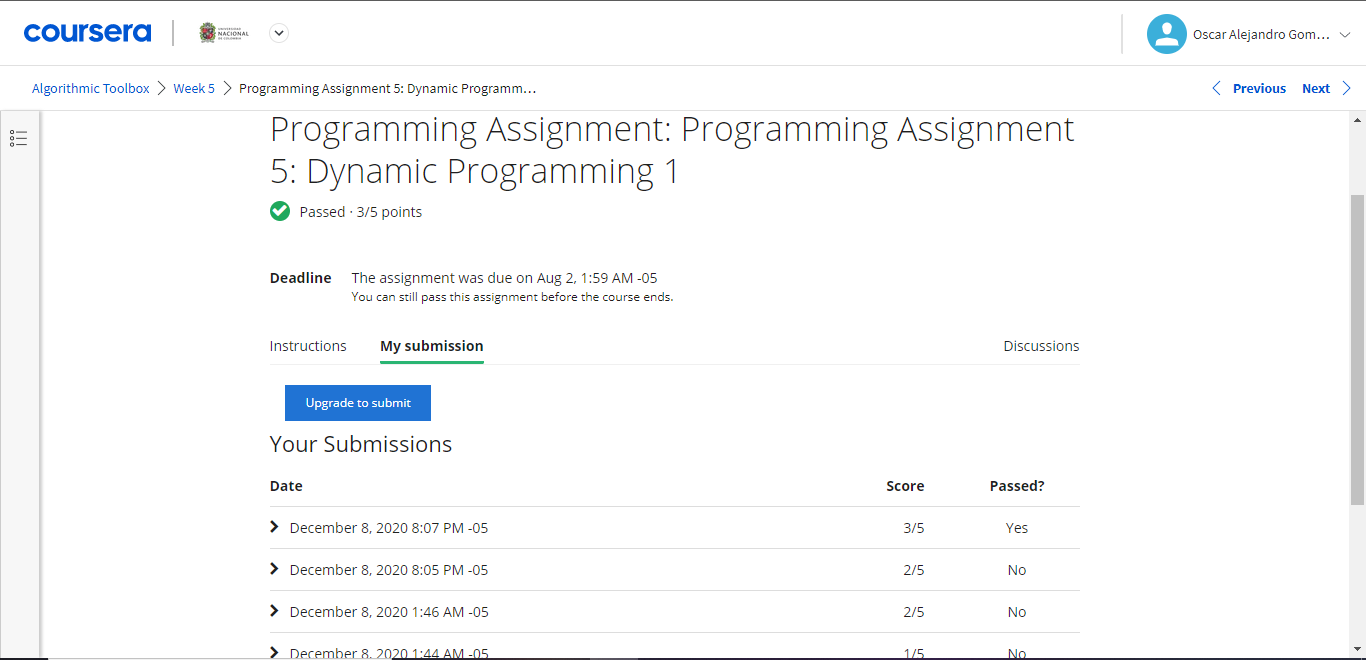